<a href="https://colab.research.google.com/github/sjj995/deep-learning/blob/main/object_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import shutil
shutil.rmtree('/content/drive/MyDrive/yolo_custom_model_Training4')

FileNotFoundError: ignored

In [2]:
!nvidia-smi -L


GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-7ba4b3c8-5748-0760-86a2-b9952827ac3e)


In [3]:
%cd /content/drive/MyDrive
!mkdir yolo_custom_model_Training4

/content/drive/MyDrive


In [4]:
!ls '/content/drive/MyDrive/yolo_custom_model_Training4'


In [5]:
%cd /content/drive/MyDrive/yolo_custom_model_Training4
!mkdir custom_data

/content/drive/MyDrive/yolo_custom_model_Training4


In [6]:
!ls '/content/drive/MyDrive/yolo_custom_model_Training4'


custom_data  naver.zip	yolov4.conv.137


In [7]:
!unzip '/content/drive/MyDrive/yolo_custom_model_Training4/naver.zip' -d '/content/drive/MyDrive/yolo_custom_model_Training4/custom_data'


Archive:  /content/drive/MyDrive/yolo_custom_model_Training4/naver.zip
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/1.jpg  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/1.txt  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/10.jpg  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/10.txt  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/100.jpg  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/100.txt  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/101.jpg  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/101.txt  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/102.jpg  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/102.txt  
  inflating: /content/drive/MyDrive/yolo_custom_model_Training4/custom_data

In [8]:
%pwd


'/content/drive/My Drive/yolo_custom_model_Training4'

In [9]:
# download dataset in current directory(above path)
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/MyDrive/yolo_custom_model_Training4/darknet'

Cloning into '/content/drive/MyDrive/yolo_custom_model_Training4/darknet'...
remote: Enumerating objects: 15316, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15316 (delta 0), reused 1 (delta 0), pack-reused 15315
Receiving objects: 100% (15316/15316), 13.70 MiB | 10.07 MiB/s, done.
Resolving deltas: 100% (10404/10404), done.
Checking out files: 100% (2043/2043), done.


In [10]:
# move current directory to darknet
%cd /content/drive/MyDrive/yolo_custom_model_Training4/darknet

/content/drive/MyDrive/yolo_custom_model_Training4/darknet


In [11]:
# change setting values in 'Makefile' file 
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

In [12]:
# Compile model
"""  take care do not disconnect : file directory may be interupted 
if your network down during compile, I recommend delete darknet folder and restart number 4(get AlexeyAB/darknet)"""

!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

In [13]:
%cd ..
!darknet/darknet

/content/drive/My Drive/yolo_custom_model_Training4
usage: darknet/darknet <function>


In [14]:
!git clone 'https://github.com/jakkcoder/training_yolo_custom_object_detection_files' '/content/drive/MyDrive/yolo_custom_model_Training4/training_yolo_custom_object_detection_files-main'

Cloning into '/content/drive/MyDrive/yolo_custom_model_Training4/training_yolo_custom_object_detection_files-main'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [15]:
%cd /content/drive/MyDrive/yolo_custom_model_Training4/training_yolo_custom_object_detection_files-main

/content/drive/MyDrive/yolo_custom_model_Training4/training_yolo_custom_object_detection_files-main


In [16]:
# check out current dir files
!ls

 creating-files-data-and-name.py
 creating-train-and-test-txt-files.py
'Custom Object detection live video.ipynb'
 Rename_files.ipynb


In [17]:
# copy creating-train-and-test-txt-files.py & creating-files-data-and-name.py
"""creating-train-and-test-txt-files.py >> create 'train.txt' & 'test.txt' files
   creating-files-data-and-name.py >> create label 'labelled_data.data' file
   <if you excute both .py files, you get mentioned files upper lines 2,3>"""

!cp creating-train-and-test-txt-files.py /content/drive/MyDrive/yolo_custom_model_Training4/custom_data
!cp creating-files-data-and-name.py /content/drive/MyDrive/yolo_custom_model_Training4/custom_data

In [18]:
%cd /content/drive/MyDrive/yolo_custom_model_Training4/custom_data

/content/drive/MyDrive/yolo_custom_model_Training4/custom_data


In [19]:
# change paths in both .py files
!sed -i '39 s@/home/my_name/Downloads/video-to-annotate@custom_data@' creating-train-and-test-txt-files.py
!sed -i '74 s@jpeg@jpg@' creating-train-and-test-txt-files.py
!sed -i '36 s@/home/my_name/Downloads/video-to-annotate@custom_data@' creating-files-data-and-name.py

In [20]:
# move current dir one step before
%cd ..

/content/drive/My Drive/yolo_custom_model_Training4


In [21]:
# excute .py file >> 'train.txt', 'test.txt'   
!python custom_data/creating-train-and-test-txt-files.py

In [22]:
# excute .py file >> 'labelled_data.data'
!python custom_data/creating-files-data-and-name.py

In [23]:
# create directory 'custom_weight'
!mkdir custom_weight

In [24]:
%pwd


'/content/drive/My Drive/yolo_custom_model_Training4'

In [25]:
%ls -l

total 62928
drwx------  2 root root     4096 Oct  8 00:57 custom_data/
drwx------  2 root root     4096 Oct  8 00:57 custom_weight/
drwx------ 16 root root     4096 Oct  8 00:55 darknet/
-rw-------  1 root root 10944304 Oct  8 00:53 naver.zip
drwx------  3 root root     4096 Oct  8 00:56 training_yolo_custom_object_detection_files-main/
-rw-------  1 root root 53477376 Oct  8 00:57 yolov4.conv.137


In [26]:
# move 'yolov4.conv.137' file to 'custom_weight' dir
!mv yolov4.conv.137 custom_weight/

In [27]:
%cd /content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg


/content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg


In [28]:
# copy yolov4.cfg file & rename & paste
!cp yolov4.cfg yolov4_custom.cfg

In [29]:
# change values for training
!sed -i '2 s@batch=64@batch=8@' yolov4_custom.cfg

!sed -i '7 s@width=608@width=416@' yolov4_custom.cfg
!sed -i '8 s@height=608@height=416@' yolov4_custom.cfg  

!sed -i '19 s@500500@2000@' yolov4_custom.cfg  #maxbatch=class*2000
!sed -i '21 s@400000,450000@1600,1800@' yolov4_custom.cfg  #maxbatch*0.8, maxbatch*0.9

!sed -i '968 s@classes=80@classes=1@' yolov4_custom.cfg
!sed -i '1056 s@classes=80@classes=1@' yolov4_custom.cfg
!sed -i '1144 s@classes=80@classes=1@' yolov4_custom.cfg

!sed -i '961 s@filters=255@filters=18@' yolov4_custom.cfg  #filters=(4+1+classes)*3 
!sed -i '1049 s@filters=255@filters=18@' yolov4_custom.cfg
!sed -i '1137 s@filters=255@filters=18@' yolov4_custom.cfg

In [30]:
%cd /content/drive/MyDrive/yolo_custom_model_Training4


/content/drive/MyDrive/yolo_custom_model_Training4


In [31]:
!mkdir backup


In [32]:
%cd /content/drive/MyDrive/yolo_custom_model_Training4


/content/drive/MyDrive/yolo_custom_model_Training4


In [33]:
!darknet/darknet detector train custom_data/labelled_data.data darknet/cfg/yolov4_custom.cfg custom_weight/yolov4.conv.137 -dont_show


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.679094), count: 5, class_loss = 4.180571, iou_loss = 3.133783, total_loss = 7.314353 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.871037), count: 4, class_loss = 0.869192, iou_loss = 0.714397, total_loss = 1.583589 
 total_bbox = 221097, rewritten_bbox = 3.493037 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.003188, iou_loss = 0.000000, total_loss = 0.003188 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.701128), count: 14, class_loss = 10.038250, iou_loss = 7.480537, total_loss = 17.518787 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.545988), count: 9, class_loss = 4.316679, iou_loss = 0.538091, total_loss = 4.854771 
 total_bbox = 221120, rewritten_bbox = 3.492674 % 
v3 (iou loss, 

In [34]:
# define helper function imShow
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  #plt.show('')

In [35]:
%cd /content/drive/MyDrive/yolo_custom_model_Training4
!ls


/content/drive/MyDrive/yolo_custom_model_Training4
backup			 darknet
chart.png		 naver.zip
chart_yolov4_custom.png  training_yolo_custom_object_detection_files-main
custom_data		 yolov4.conv.137
custom_weight


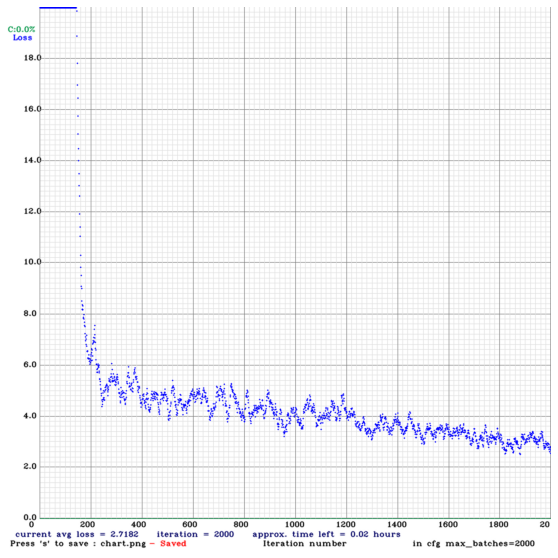

In [36]:
# only works if the training does not get interrupted 
imShow('chart.png')

In [37]:
%cd custom_data

!sed -i 's@custom_data@/content/drive/MyDrive/yolo_custom_model_Training4/custom_data@' test.txt
!sed -i 's@custom_data@/content/drive/MyDrive/yolo_custom_model_Training4/custom_data@' train.txt

!sed -i 's@custom_data@/content/drive/MyDrive/yolo_custom_model_Training4/custom_data@' labelled_data.data
!sed -i '5 s@.*@backup = /content/drive/MyDrive/yolo_custom_model_Training4/backup/@' labelled_data.data

!cat labelled_data.data

/content/drive/MyDrive/yolo_custom_model_Training4/custom_data
classes = 1
train = /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/train.txt
valid = /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/test.txt
names = /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/classes.names
backup = /content/drive/MyDrive/yolo_custom_model_Training4/backup/

In [38]:
%cd /content/drive/My Drive/yolo_custom_model_Training4/darknet
!chmod +x ./darknet

/content/drive/My Drive/yolo_custom_model_Training4/darknet


In [39]:
#You can check the mAP for all the saved weights to see which gives the best results

!./darknet detector map /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/labelled_data.data /content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg/yolov4_custom.cfg /content/drive/MyDrive/yolo_custom_model_Training4/backup/yolov4_custom_final.weights -points 0

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


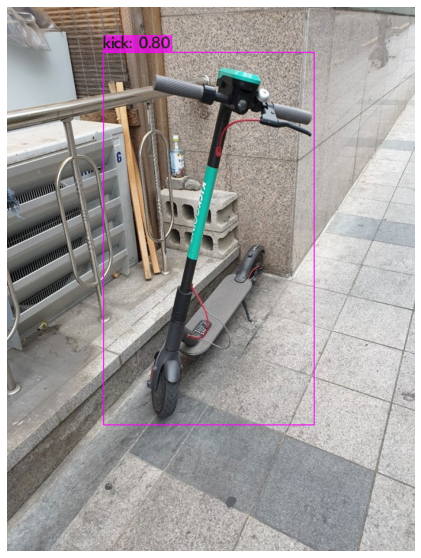

In [41]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test /content/drive/MyDrive/yolo_custom_model_Training3/custom_data/labelled_data.data /content/drive/MyDrive/yolo_custom_model_Training3/darknet/cfg/yolov4_custom.cfg /content/drive/MyDrive/yolo_custom_model_Training4/backup/yolov4_custom_final.weights /content/drive/MyDrive/yolo_custom_model_Training3/testing/kick1.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


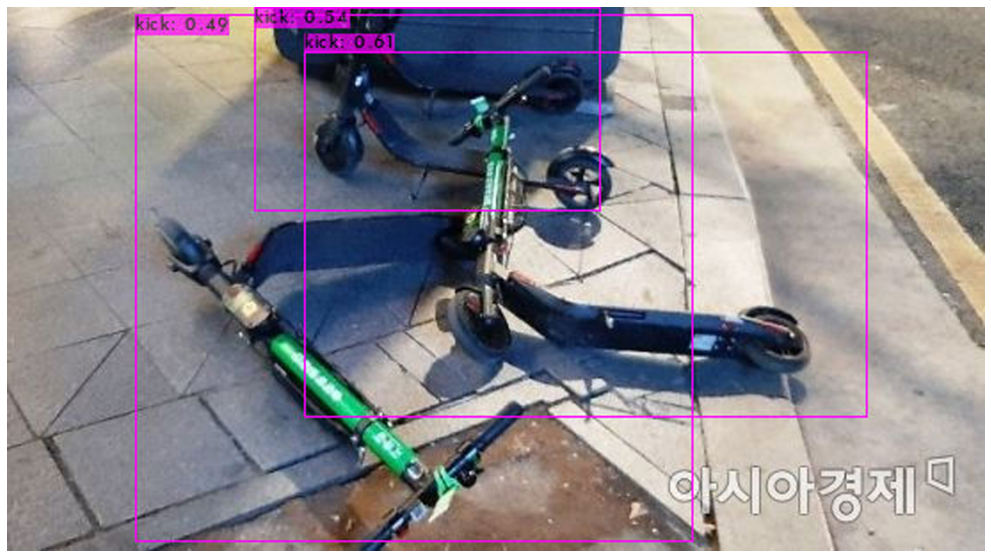

In [45]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/labelled_data.data /content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg/yolov4_custom.cfg /content/drive/MyDrive/yolo_custom_model_Training4/backup/yolov4_custom_final.weights /content/drive/MyDrive/yolo_custom_model_Training4/kick1.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


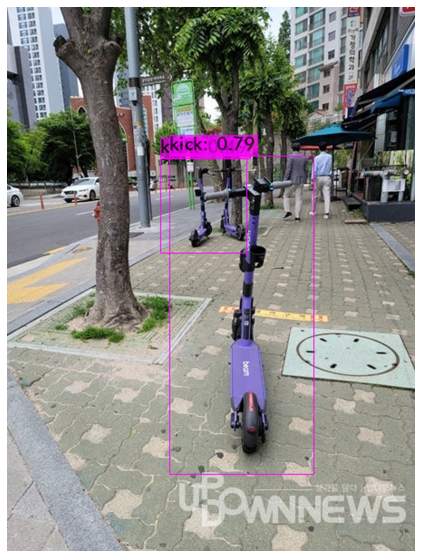

In [46]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/labelled_data.data /content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg/yolov4_custom.cfg /content/drive/MyDrive/yolo_custom_model_Training4/backup/yolov4_custom_final.weights /content/drive/MyDrive/yolo_custom_model_Training4/kick2.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


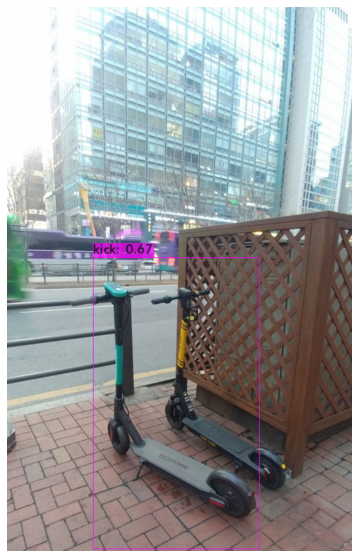

In [49]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/labelled_data.data /content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg/yolov4_custom.cfg /content/drive/MyDrive/yolo_custom_model_Training4/backup/yolov4_custom_final.weights /content/drive/MyDrive/yolo_custom_model_Training4/kick3.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF


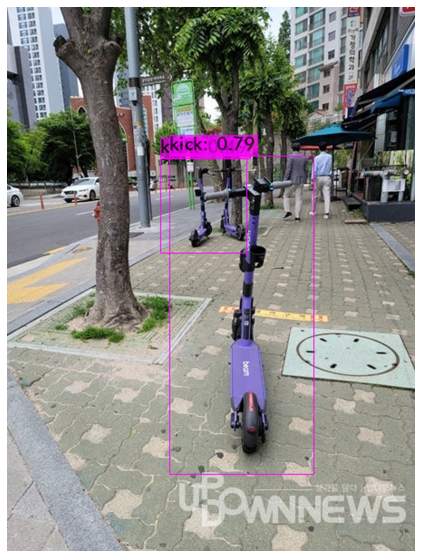

In [48]:
# run your custom detector with this command (upload an image to your google drive to test, the thresh flag sets the minimum accuracy required for object detection)

!./darknet detector test /content/drive/MyDrive/yolo_custom_model_Training4/custom_data/labelled_data.data /content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg/yolov4_custom.cfg /content/drive/MyDrive/yolo_custom_model_Training4/backup/yolov4_custom_final.weights /content/drive/MyDrive/yolo_custom_model_Training4/kick2.jpg -thresh 0.3
imShow('predictions.jpg')

In [56]:
%cd /content/drive/MyDrive/yolo_custom_model_Training4/darknet

/content/drive/MyDrive/yolo_custom_model_Training4/darknet


In [60]:
# run your custom detector on a video with this command (upload a video to your google drive to test, the thresh flag sets the minimum accuracy required for object detection).This saves the output video with the detections in your output path

!./darknet detector demo /content/drive/MyDrive/yolo_custom_model_Training4/darknet/cfg/yolov4-tiny-custom.cfg /content/drive/MyDrive/yolo_custom_model_Training4/backup/yolov4_custom_final.weights -dont_show /content/drive/MyDrive/yolo_custom_model_Training4/video.mp4 -i 0 -out_filename /content/drive/MyDrive/yolo_custom_model_Training4/result_video.mp4

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
names: Using default 'data/names.list'
Couldn't open file: data/names.list
